In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from transformers import BertTokenizer, BertForSequenceClassification
import torch
import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Dow Jones Industrial Averages (DJIA)

## Reading Data

In [ ]:
stock_data_news = pd.read_csv('/content/Combined_News_DJIA.csv')
stock_data = pd.read_csv('/content/upload_DJIA_table.csv')
stock_data_news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,8/8/2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,8/11/2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,8/12/2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,8/13/2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,8/14/2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to mis

In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


## Exploratory Data Analysis On The Dow Jones Industrial Index

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


### Checking And Filling Null Values

In [ ]:
stock_data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [ ]:
stock_data_news.isnull().sum()

,0
Date,0
Label,0
Top1,0
Top2,0
Top3,0
Top4,0
Top5,0
Top6,0
Top7,0
Top8,0


In [ ]:
stock_data_news.dtypes

,0
Date,object
Label,int64
Top1,object
Top2,object
Top3,object
Top4,object
Top5,object
Top6,object
Top7,object
Top8,object


In [ ]:
stock_data.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


In [ ]:
def convert_data_column_to_datetime(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name])
    return df


stock_data = convert_data_column_to_datetime(stock_data, 'Date')
stock_data_news = convert_data_column_to_datetime(stock_data_news, 'Date')

In [ ]:
stock_data_news[stock_data_news.isnull().any(axis=1)]

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
277,2009-09-15,1,b'The Church of Scientology won\'t be dissolve...,b'New virus from rats can kill 80 per cent of ...,b'The gruesome spectacle of dolphins being sla...,b'The End of Innocence in Afghanistan: \'The G...,b'France approves Internet piracy bill',b'The Rural Doctors Association says right now...,b'Al Jazeera English - Africa - Shabab to aven...,"b""How Sri Lanka governs through detentions - S...",...,b'In an equine echo of the controversy surroun...,b'UPDATE: 5-New York homes raided in terrorism...,b'Population Growth Impeding Progress on the M...,b'Global Population to Reach 7 Billion by 2011',b'Government Funded Feminist Porn ',b'Can someone enlighten me re:Holy Land disput...,b'Human Rights Watch official suspended for co...,NaN,NaN,NaN
348,2009-12-24,1,b'Woman knocks down Pope Benedict at Christmas...,b'Ugandan President Museveni says he will bloc...,"b""Venezuela's Chavez threatens to kick out car...",b'Woman who knocked down pope had pasta in her...,"b'450 people from 21 countries, including 30 f...",b'Chvez declares Angel Falls is no more: World...,b'Drug tests catch out 10 police (UK)',"b'Once the worlds fourth-largest lake, the Ara...",...,b'Pig farts spark Australia gas scare - I shit...,b'Bin Laden daughter flees to Saudi embassy in...,b'Traumatic Brain Injuries: Growing evidence ...,b'The Pakistan Supreme Court has ordered the P...,"b""Here's a video the Taliban released this mor...",b'Fireworks set off aboard airliner',"b'Five VA men may face terrorism charges, Paki...","b""Ayatollah Montazeri's Legacy: In death he m...",NaN,NaN
681,2011-04-21,1,"Director of ""Restrepo"" and Photographer Chris ...",Everyone within 20km of Fukushima will be forc...,Bahrain: Activist Zaynab Al-Khawaja's letter t...,"More than 80,000 people are claiming incapacit...",Libya: 'mission creep' claims as UK sends in m...,Japan considers banning access to evacuation zone,Chinese oil giant Sinopec has stopped exportin...,6.0-magnitude earthquake strikes off east coas...,...,Russian migration official fired in racism row...,Small amounts of radioactive iodine found in b...,"War photographer, Oscar-nominated film directo...",Effeminate boys are being sent to a special ca...,Japan Government Declares 12-Mile Area Around ...,TEPCO admitted Wednesday that nuclear fuel in ...,Fukushima evacuees face arrest if they return ...,Prince Charles wins some kind of a record,NaN,NaN


In [ ]:
stock_data.dropna(inplace=True)
stock_data_news.dropna(inplace=True)

In [ ]:
stock_data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


### Merging News Data And Stock Data Together

In [ ]:
# join stock_data_news on stock_data by date
stock_data = stock_data.merge(stock_data_news, on='Date', how='left')

### Visualization Of The Label Distribution

In [ ]:
stock_data['Label'].value_counts()

,count
Label,
1.0,1062
0.0,924


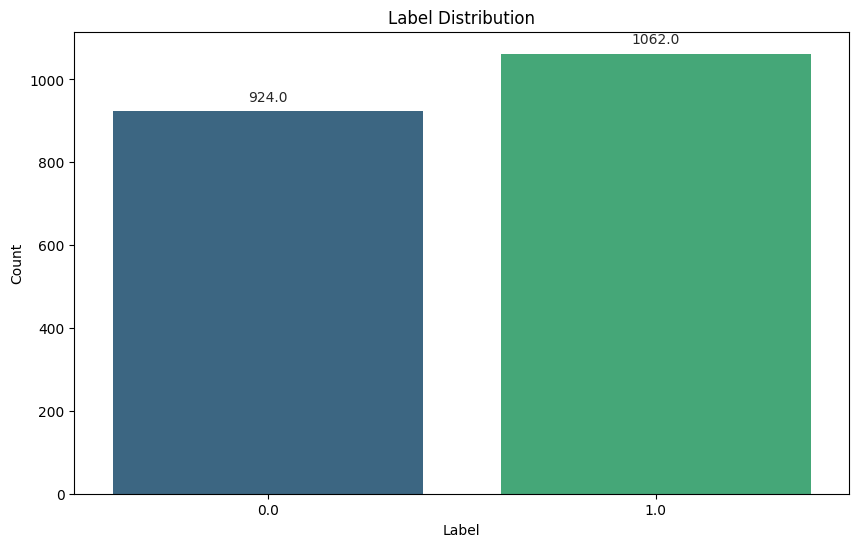

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Label', data=stock_data, palette='viridis')  # Add palette
sns.set_style('whitegrid')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')

plt.show()

### Datetime Conversion And Setting Data Index

In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data_news['Date'] = pd.to_datetime(stock_data_news['Date'])

In [ ]:
stock_data.set_index('Date', inplace=True)

## Combining Headlines

In [ ]:
# combine all news headlines in a row
headline=[]
for row in range(0,len(stock_data.index)):
    headline.append(" ".join(str(x) for x in stock_data.iloc[row,7:]))

clean_headline=[]
for i in range(0,len(headline)):
    clean_headline.append(re.sub("b[(')]",'',headline[i])) #remove b'
    clean_headline[i]=re.sub('b[(")]','',clean_headline[i]) #remove b"
    clean_headline[i]=re.sub("\'",'',clean_headline[i]) #remove \'

stock_data['Combined_News'] = clean_headline
stock_data.head()

,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,Top3,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined_News
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,1.0,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",...,S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...,A 117-year-old woman in Mexico City finally re...
2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,1.0,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...,Jamaica proposes marijuana dispensers for tour...
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,1.0,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,...,The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...,Explosion At Airport In Istanbul Yemeni former...
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,1.0,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,...,There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...,"2,500 Scientists To Australia: If You Want To ..."
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,0.0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...,Barclays and RBS shares suspended from trading...


In [ ]:
stock_data.tail()

,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,Top3,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined_News
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1.0,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,...,"b""Georgia confict could set back Russia's US r...",b'War in the Caucasus is as much the product o...,"b'""Non-media"" photos of South Ossetia/Georgia ...",b'Georgian TV reporter shot by Russian sniper ...,b'Saudi Arabia: Mother moves to block child ma...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,All the experts admit that we should legalise ...
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0.0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0.0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1.0,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...


## Trend Analysis On The DJIA Stock Data

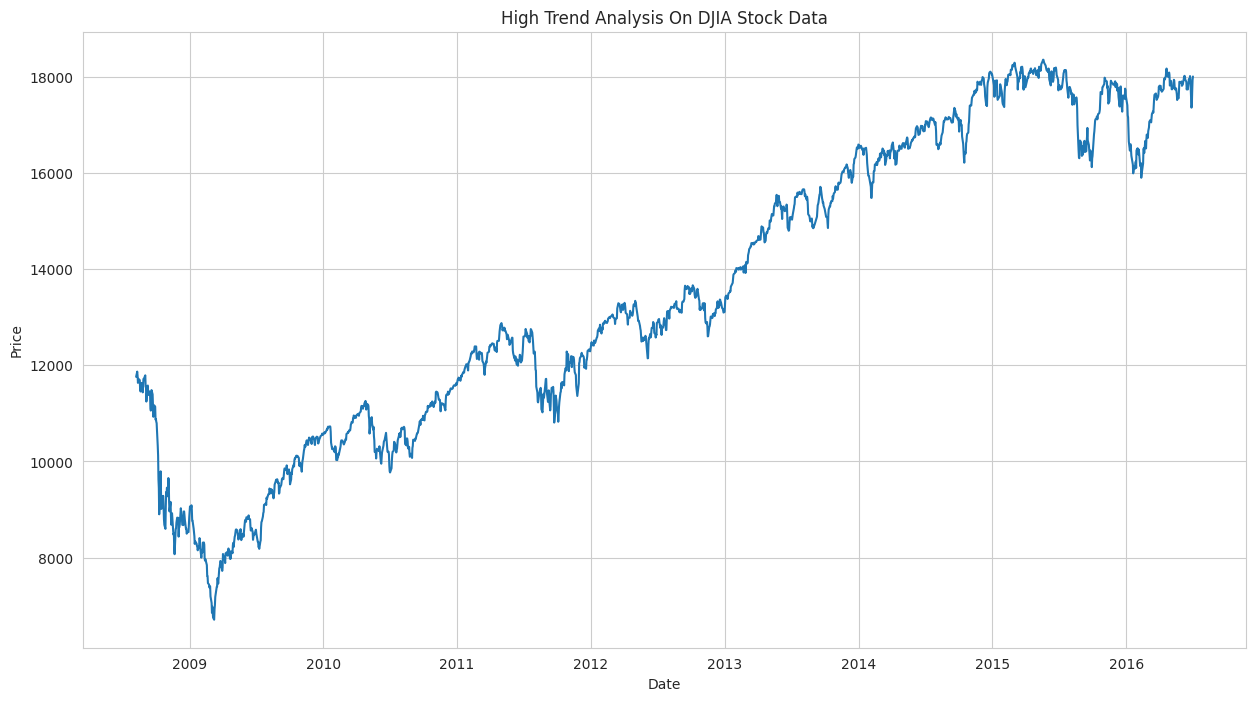

In [ ]:
# plot the high trend of the stock data
plt.figure(figsize=(15,8))
plt.plot(stock_data['High'])
plt.title('High Trend Analysis On DJIA Stock Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# Calculate SMA for 10 days
stock_data['SMA_30'] = stock_data['High'].rolling(window=30).mean()

# Calculate EMA for 10 days
stock_data['EMA_30'] = stock_data['High'].ewm(span=30, adjust=False).mean()

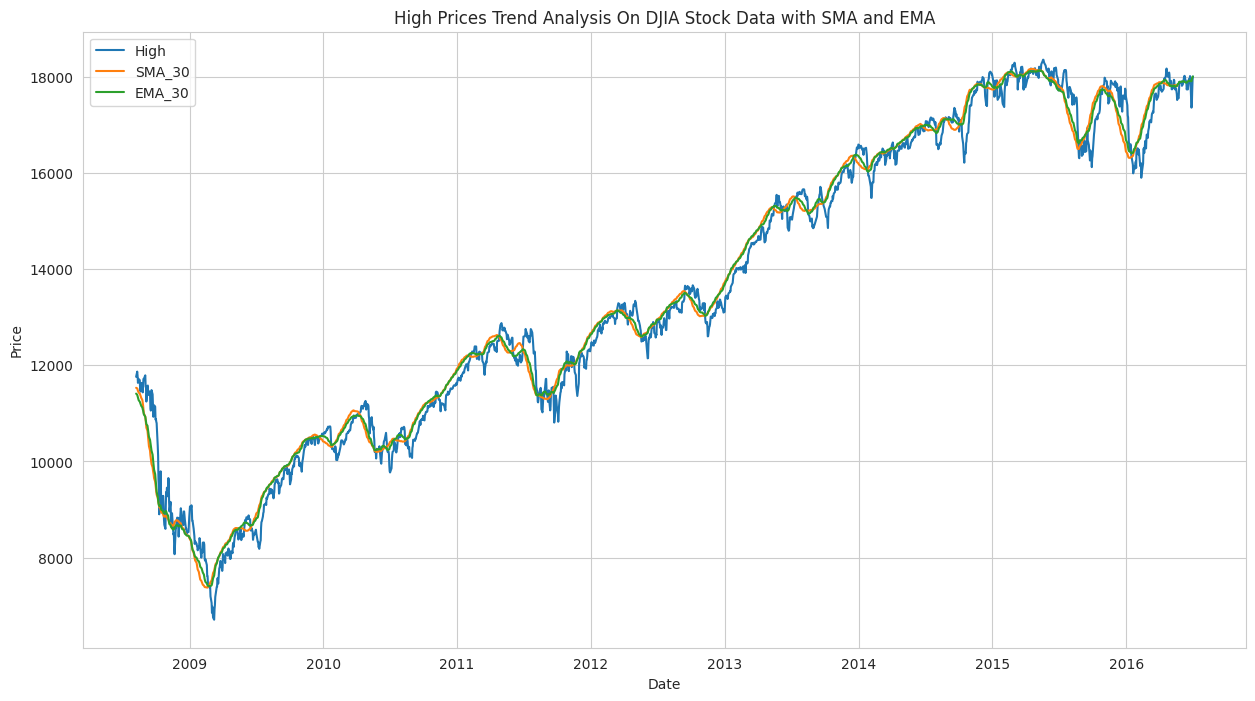

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(stock_data['High'], label='High')  # Original High trend
plt.plot(stock_data['SMA_30'], label='SMA_30')  # Plot SMA
plt.plot(stock_data['EMA_30'], label='EMA_30')  # Plot EMA
plt.title('High Prices Trend Analysis On DJIA Stock Data with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()  # Show legend to identify lines
plt.show()

In [ ]:
sub_list = ['Label', 'Combined_News', 'High' , 'Low', 'Open', 'Close', 'Volume']
stock_data_new = stock_data[sub_list]
stock_data_new.head()

,Label,Combined_News,High,Low,Open,Close,Volume
Date,,,,,,,
2016-07-01,1.0,A 117-year-old woman in Mexico City finally re...,18002.380859,17916.910156,17924.240234,17949.369141,82160000
2016-06-30,1.0,Jamaica proposes marijuana dispensers for tour...,17930.609375,17711.800781,17712.759766,17929.990234,133030000
2016-06-29,1.0,Explosion At Airport In Istanbul Yemeni former...,17704.509766,17456.019531,17456.019531,17694.679688,106380000
2016-06-28,1.0,"2,500 Scientists To Australia: If You Want To ...",17409.720703,17190.509766,17190.509766,17409.720703,112190000
2016-06-27,0.0,Barclays and RBS shares suspended from trading...,17355.210938,17063.080078,17355.210938,17140.240234,138740000


## Sentiment Analysis On Combined Headlines

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd

# # Load the FinBERT tokenizer and model (using the "yiyanghkust/finbert-tone" model)
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")

def get_finbert_sentiment(text):
    """
    Returns sentiment scores (compound, positive, negative, neutral) for a given text.
    The model outputs logits for 3 classes: [positive, neutral, negative].
    We apply softmax to get probabilities.
    """
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)

    # Get the logits from the model
    outputs = model(**inputs)

    # Convert logits to probabilities
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)[0]

    # Extract probabilities for each sentiment class
    positive = probs[0].item()  # probability for "positive"
    neutral = probs[1].item()   # probability for "neutral"
    negative = probs[2].item()  # probability for "negative"

    # Create a compound score (for example, positive minus negative)
    compound = positive - negative

    return compound, positive, negative, neutral

In [ ]:
# Apply get_finbert_sentiment to each news headline
start_time = time.time()
stock_data_selected = stock_data_new.copy()
stock_data_selected[['sentiment_compound', 'sentiment_positive', 'sentiment_negative', 'sentiment_neutral']] = \
    stock_data_selected['Combined_News'].apply(lambda x: pd.Series(get_finbert_sentiment(x)))
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

Execution time: 4109.023648023605 seconds


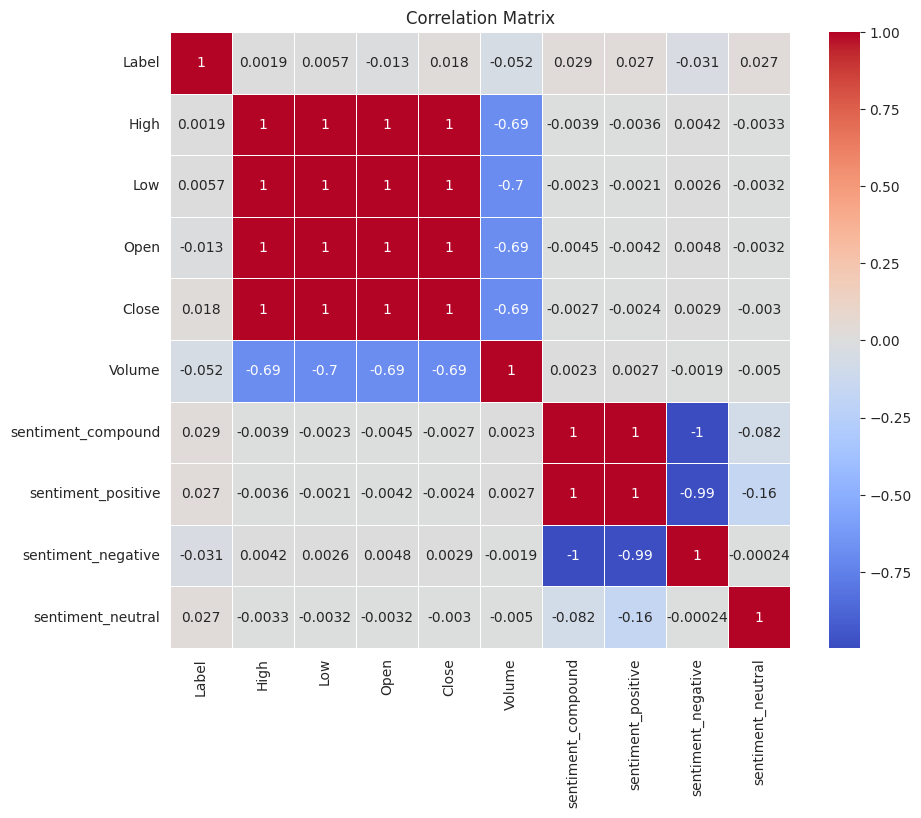

In [ ]:
numerical_cols = stock_data_selected.select_dtypes(include=[np.number]).columns
correlation_matrix = stock_data_selected[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
def determine_sentiment_label(row):
    # Create a dictionary of scores from the computed columns
    scores = {
        "positive": row["sentiment_positive"],
        "neutral": row["sentiment_neutral"],
        "negative": row["sentiment_negative"]
    }
    # Return the key (label) with the highest score
    return max(scores, key=scores.get)

# Apply the function to each row to create a new column 'sentiment_label'
stock_data_selected["sentiment_label"] = stock_data_selected.apply(determine_sentiment_label, axis=1)

In [ ]:
stock_data_selected

,Label,Combined_News,High,Low,Open,Close,Volume,sentiment_compound,sentiment_positive,sentiment_negative,sentiment_neutral,sentiment_label
Date,,,,,,,,,,,,
2016-07-01,1.0,A 117-year-old woman in Mexico City finally re...,18002.380859,17916.910156,17924.240234,17949.369141,82160000,0.997558,0.998754,0.001195,0.000051,positive
2016-06-30,1.0,Jamaica proposes marijuana dispensers for tour...,17930.609375,17711.800781,17712.759766,17929.990234,133030000,0.975361,0.987624,0.012263,0.000113,positive
2016-06-29,1.0,Explosion At Airport In Istanbul Yemeni former...,17704.509766,17456.019531,17456.019531,17694.679688,106380000,0.985818,0.992886,0.007068,0.000046,positive
2016-06-28,1.0,"2,500 Scientists To Australia: If You Want To ...",17409.720703,17190.509766,17190.509766,17409.720703,112190000,0.994804,0.997292,0.002487,0.000221,positive
2016-06-27,0.0,Barclays and RBS shares suspended from trading...,17355.210938,17063.080078,17355.210938,17140.240234,138740000,0.986246,0.993066,0.006820,0.000115,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
2008-08-14,1.0,All the experts admit that we should legalise ...,11718.280273,11450.889648,11532.070312,11615.929688,159790000,0.999367,0.999675,0.000308,0.000018,positive
2008-08-13,0.0,U.S. refuses Israel weapons to attack Iran: r...,11633.780273,11453.339844,11632.809570,11532.959961,182550000,0.974588,0.987119,0.012531,0.000350,positive
2008-08-12,0.0,Remember that adorable 9-year-old who sang at ...,11782.349609,11601.519531,11781.700195,11642.469727,173590000,0.992261,0.996095,0.003834,0.000071,positive


In [ ]:
stock_data_selected['sentiment_label'].value_counts()

,count
sentiment_label,
positive,1932
negative,56
neutral,1


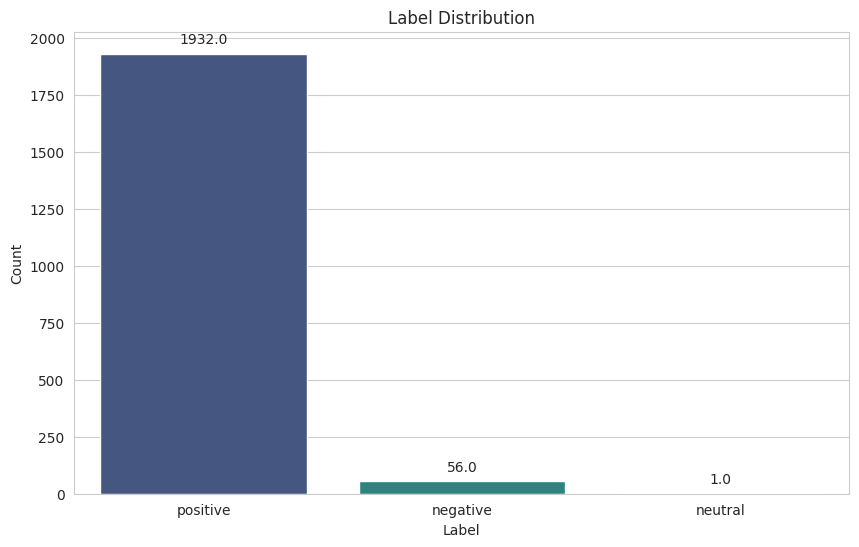

In [ ]:
# bar chart to show distibution
plt.figure(figsize=(10,6))
ax = sns.countplot(x='sentiment_label', data=stock_data_selected, palette='viridis')  # Add palette
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## ML Modeling Of Combined Headlines

In [ ]:
stock_data_selected.isnull().sum()
stock_data_selected.dropna(inplace=True)

In [ ]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(2, 2),
    min_df=2,   # ignore n-grams that appear in fewer than 5 documents
    max_df=0.8  # ignore n-grams that appear in more than 80% of the documents
)
X = vectorizer.fit_transform(stock_data_selected['Combined_News'])

In [ ]:
y = stock_data_selected['Label']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
log_model_pred = log_model.predict(X_test)
print("Logisitic Regression Classification Report")
print(classification_report(y_test, log_model_pred))

Logisitic Regression Classification Report
              precision    recall  f1-score   support

         0.0       0.45      0.05      0.09       190
         1.0       0.52      0.94      0.67       208

    accuracy                           0.52       398
   macro avg       0.49      0.50      0.38       398
weighted avg       0.49      0.52      0.40       398



Text(0.5, 1.0, 'Confusion Matrix : Logisitic Regression')

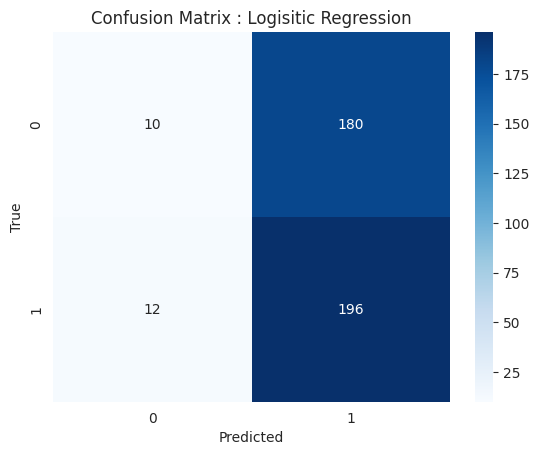

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_model_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix : Logisitic Regression')

In [ ]:
# hyper parameter tuning of logisitic regression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1],
              'penalty': ['l1', 'l2']
              }

log_grid_search = GridSearchCV(log_model, param_grid, cv=5)
log_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']})

In [ ]:
log_model_grid_pred = log_grid_search.predict(X_test)
print("Logisitic Regression Classification Report")
print(classification_report(y_test, log_model_grid_pred))

Logisitic Regression Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       190
         1.0       0.52      1.00      0.69       208

    accuracy                           0.52       398
   macro avg       0.26      0.50      0.34       398
weighted avg       0.27      0.52      0.36       398



In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_model_pred = rf_model.predict(X_test)
print("Random Forest Classification Report")
print(classification_report(y_test, rf_model_pred))

Random Forest Classification Report
              precision    recall  f1-score   support

         0.0       0.45      0.09      0.16       190
         1.0       0.52      0.89      0.66       208

    accuracy                           0.51       398
   macro avg       0.48      0.49      0.41       398
weighted avg       0.49      0.51      0.42       398



Text(0.5, 1.0, 'Confusion Matrix : RandomForest')

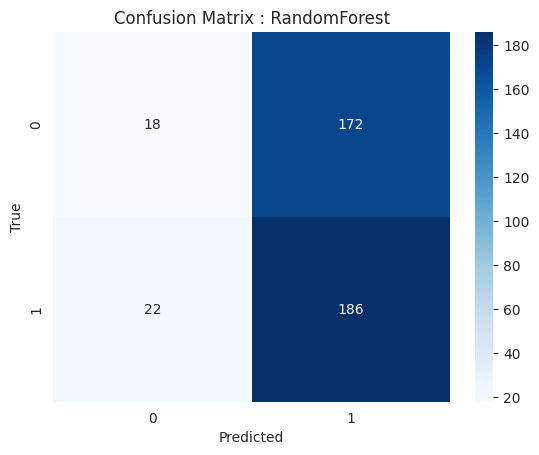

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, rf_model_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix : RandomForest')

In [ ]:
# hyper parameter tuning for random forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]}

rf_grid_search = GridSearchCV(rf_model, param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

rf_model_grid_pred = rf_grid_search.predict(X_test)
print("Random Forest Classification Report")
print(classification_report(y_test, rf_model_grid_pred))

Random Forest Classification Report
              precision    recall  f1-score   support

         0.0       0.38      0.03      0.06       190
         1.0       0.52      0.95      0.67       208

    accuracy                           0.51       398
   macro avg       0.45      0.49      0.36       398
weighted avg       0.45      0.51      0.38       398



# S&P 500 News Headlines Sentiment Classifier On Impact

In [ ]:
s_p_stock_data = pd.read_csv("/content/labeled_News_dataset.csv")

In [ ]:
s_p_stock_data.head()

,title,text,label
0,Stocks making the biggest moves midday: Palo A...,A view of the exterior of the new Dutch head o...,-2
1,3M will spin off its health-care business into...,3M announced Tuesday it will spin off its heal...,-2
2,"Stocks making the biggest moves midday: 3M, Pa...",A woman walks near a Bed Bath & Beyond branch ...,0
3,"3M to cut 2,500 jobs as demand weakens, profit...",An employee unboxes N95 masks as part of a gov...,0
4,"3M combat earplug lawsuits to proceed, judge r...","3M must face more than 230,000 lawsuits accusi...",-2


In [ ]:
s_p_stock_data.iloc[:,1:2]

,text
0,A view of the exterior of the new Dutch head o...
1,3M announced Tuesday it will spin off its heal...
2,A woman walks near a Bed Bath & Beyond branch ...
3,An employee unboxes N95 masks as part of a gov...
4,"3M must face more than 230,000 lawsuits accusi..."
...,...
4511,The deal for Zoetis comes as its parent Pfizer...
4512,After significantly outperforming the broader ...
4513,Zoetis shares have fallen about 10% since thei...
4514,"On Wednesday, CNBC is unveiling Changemakers, ..."


In [ ]:
s_p_stock_data['label'].value_counts()

,count
label,
0,2667
2,530
-2,523
1,406
-1,390


In [ ]:
# Separate the data into two DataFrames: one for label '0' and one for the rest
label_0_data = s_p_stock_data[s_p_stock_data['label'] == 0]
other_labels_data = s_p_stock_data[s_p_stock_data['label'] != 0]

# Sample 500 data points from the label '0' DataFrame
sampled_label_0_data = label_0_data.sample(n=500, replace=False)  # No replacement needed since there are more than 500

# Concatenate the sampled label '0' data with the rest of the data
balanced_data = pd.concat([sampled_label_0_data, other_labels_data])

In [ ]:
balanced_data['label'].value_counts()

,count
label,
2,530
-2,523
0,500
1,406
-1,390


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(s_p_stock_data['title'])

count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(s_p_stock_data['title'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_count,
    s_p_stock_data['label'],
    test_size=0.1,
    random_state=42
)

In [ ]:
sp_log_model = LogisticRegression()
sp_log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(classification_report(y_test, sp_log_model.predict(X_test)))

              precision    recall  f1-score   support

          -2       0.24      0.13      0.17        46
          -1       0.00      0.00      0.00        43
           0       0.64      0.86      0.74       273
           1       0.00      0.00      0.00        37
           2       0.37      0.19      0.25        53

    accuracy                           0.56       452
   macro avg       0.25      0.24      0.23       452
weighted avg       0.46      0.56      0.49       452



In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1],
              'penalty': ['l1', 'l2']}

sp_log_grid_search = GridSearchCV(sp_log_model, param_grid, cv=5)

sp_log_grid_search.fit(X_train, y_train)

print(sp_log_grid_search.best_params_)
print(classification_report(y_test, sp_log_grid_search.predict(X_test)))

{'C': 0.001, 'penalty': 'l2'}
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        46
          -1       0.00      0.00      0.00        43
           0       0.60      1.00      0.75       273
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        53

    accuracy                           0.60       452
   macro avg       0.12      0.20      0.15       452
weighted avg       0.36      0.60      0.45       452



In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_model_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_model_pred))

              precision    recall  f1-score   support

          -2       0.45      0.11      0.18        46
          -1       0.00      0.00      0.00        43
           0       0.62      0.96      0.75       273
           1       0.00      0.00      0.00        37
           2       0.23      0.06      0.09        53

    accuracy                           0.60       452
   macro avg       0.26      0.22      0.20       452
weighted avg       0.45      0.60      0.48       452



In [ ]:
rf_param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]}

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

rf_model_grid_pred = rf_grid_search.predict(X_test)
print(classification_report(y_test, rf_model_grid_pred))

              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        46
          -1       0.00      0.00      0.00        43
           0       0.60      1.00      0.75       273
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        53

    accuracy                           0.60       452
   macro avg       0.12      0.20      0.15       452
weighted avg       0.36      0.60      0.45       452

